# Build ROC curve and ana. test results: like confusion matrix etc.

In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os.path
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json
from os.path import isfile, join

from numpy import load

In [7]:
import seaborn as sns
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr, '-') 
    plt.axis([-0.05, 1.05,-0.05,1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.grid()
    #plt.show()    

In [5]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
        
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, square=True, xticklabels=class_names, yticklabels=class_names, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=20)
    ax.set_xlabel('Predicted Label', fontsize=20)

In [4]:
true_clases_2stg_4k = load('/home/andrii/work/cnn/data_types/4_class/resnet_2stg_true_classes_data.npy')
predict_clases_2stg_4k = load('/home/andrii/work/cnn/data_types/4_class/resnet_2stg_model_pred_classes_data.npy')
files_2stg_4k = load('/home/andrii/work/cnn/data_types/4_class/resnet_2stg_files.npy')

Model Accuracy : 82.47%


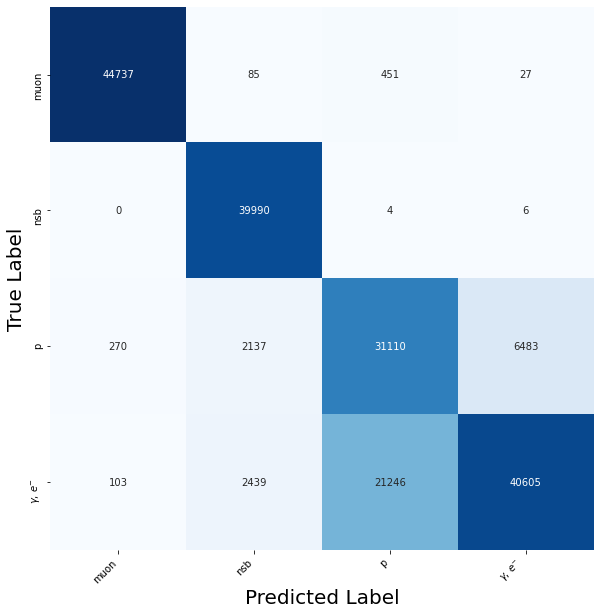

In [8]:
model_pred_classes_2stg_4k = np.argmax(predict_clases_2stg_4k, axis=1)
model_acc_2stg_4k = accuracy_score(true_clases_2stg_4k, model_pred_classes_2stg_4k)
print("Model Accuracy : {:.2f}%".format(model_acc_2stg_4k * 100))

fig, ax3 = plt.subplots(1, 1, figsize=(10, 10))

#model_pred_classes_2stg = np.argmax(predict_clases_2stg, axis=1)
plot_heatmap(true_clases_2stg_4k, model_pred_classes_2stg_4k, ['muon', 'nsb', 'p', '$\gamma$, $e^{-}$'], ax3, title="")
plt.savefig('heatmap_2stg_4cl.png', dpi=200)

In [ ]:
100 - 100*(2439 + 2137+85)/(44737 + 85+451+27 + 270+2137+31110+6483 + 103+2439+21246+40605)

In [9]:
true_muon_predict_val = []
true_nsb_predict_val = []
true_proton_predict_val = []
true_shower_predict_val = []

for index in range(len(true_clases_2stg_4k)):
    if true_clases_2stg_4k[index] == 0:
        true_muon_predict_val.append(predict_clases_2stg_4k[index, 0])
    elif true_clases_2stg_4k[index] == 1:
        true_nsb_predict_val.append(predict_clases_2stg_4k[index, 1])
    elif true_clases_2stg_4k[index] == 2:
        true_proton_predict_val.append(predict_clases_2stg_4k[index, 2])
    elif true_clases_2stg_4k[index] == 3:
        true_shower_predict_val.append(predict_clases_2stg_4k[index, 3])
        

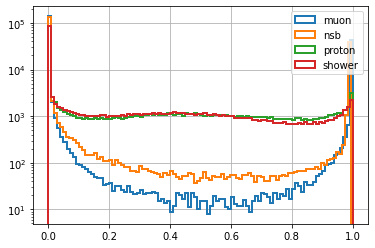

In [10]:
plt.hist(predict_clases_2stg_4k[:,0], bins = 100, histtype='step', linewidth=2, label = 'muon')
plt.hist(predict_clases_2stg_4k[:,1], bins = 100, histtype='step', linewidth=2, label = 'nsb')
plt.hist(predict_clases_2stg_4k[:,2], bins = 100, histtype='step', linewidth=2, label = 'proton')
plt.hist(predict_clases_2stg_4k[:,3], bins = 100, histtype='step', linewidth=2, label = 'shower')
plt.grid()
plt.yscale('log')
plt.legend()

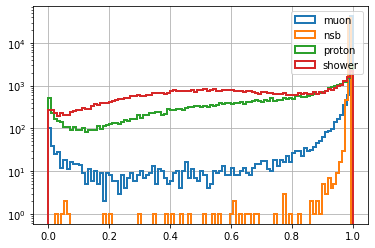

In [11]:
plt.hist(true_muon_predict_val, bins = 100, histtype='step', linewidth=2, label = 'muon')
plt.hist(true_nsb_predict_val, bins = 100, histtype='step', linewidth=2, label = 'nsb')
plt.hist(true_proton_predict_val, bins = 100, histtype='step', linewidth=2, label = 'proton')
plt.hist(true_shower_predict_val, bins = 100, histtype='step', linewidth=2, label = 'shower')
plt.grid()
plt.yscale('log')
plt.legend()

In [ ]:
model_pred_classes_2stg_4k = []
threshold = 0.15

for index in range(len(predict_clases_2stg_4k)):
    
    arg_max_tmp = np.argmax(predict_clases_2stg_4k[index])
    if arg_max_tmp != 1:
        model_pred_classes_2stg_4k.append( arg_max_tmp )
    elif predict_clases_2stg_4k[index][1] > threshold:
        model_pred_classes_2stg_4k.append( arg_max_tmp )
    else:
        tmp_value = predict_clases_2stg_4k[index]
        tmp_value[1] = -1
        
        model_pred_classes_2stg_4k.append( np.argmax(tmp_value) )

In [ ]:
predict_clases_2stg_4k[0]

In [ ]:
ar = [0, 1, 2, 3]
arc = np.append(ar[0], ar[2:]) 

In [ ]:
arc

In [14]:
true_clases_2stg_2k = []
predict_clases_2stg_2k = []

for index in range(len(true_clases_2stg_4k)):
    if true_clases_2stg_4k[index] == 1:
        true_clases_2stg_2k.append(0)
    else:
        true_clases_2stg_2k.append(1)
        
predict_clases_2stg_2k = [predict_clases_2stg_4k[:, 1], predict_clases_2stg_4k[:, 0] + predict_clases_2stg_4k[:, 2] + predict_clases_2stg_4k[:, 3]]
predict_clases_2stg_2k = np.array(predict_clases_2stg_2k).T

model_pred_classes_2stg_2k = np.argmax(predict_clases_2stg_2k, axis=1)

In [ ]:
len(model_pred_classes_2stg_2k[model_pred_classes_2stg_2k <0.5])

In [ ]:
len(model_pred_classes_2stg_2k[model_pred_classes_2stg_2k >0.5])

In [ ]:
len(predict_clases_2stg_2k[predict_clases_2stg_2k[:,0] < 0.5, 0])

In [157]:
model_pred_classes_2stg_2k = []
threshold = 0.945

for index in range(len(predict_clases_2stg_2k)):
    
    if predict_clases_2stg_2k[index][1] > threshold:
        model_pred_classes_2stg_2k.append(1)
        #if true_clases_2stg_2k[index] != 1:
            #print(files_2stg_4k[index])
    else:
        model_pred_classes_2stg_2k.append(0)

In [179]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
        
    cm = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=2)
    sas_data = sns.heatmap(cm, annot=True, square=True, xticklabels=class_names, yticklabels=class_names, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax, annot_kws={'size':16})
    #sas_data.set_xlabel(fontsize=20)
    
    ax.set_title(title, fontsize=16)
    #ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=20)
    ax.set_xlabel('Predicted Label', fontsize=20)

Model Accuracy : 95.28%


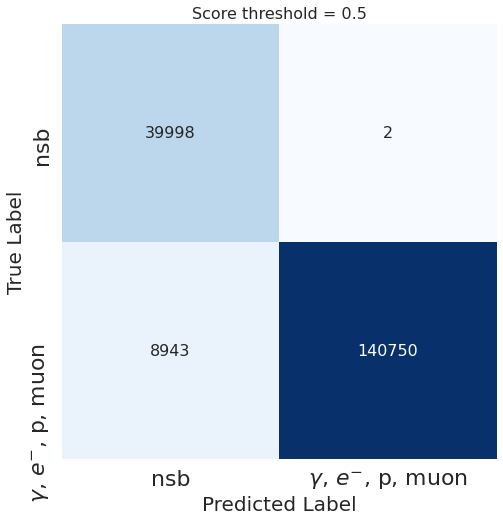

In [180]:
#model_pred_classes_2stg_2k = np.argmax(predict_clases_2stg_2k, axis=1)

model_acc_2stg_2k = accuracy_score(true_clases_2stg_2k, model_pred_classes_2stg_2k)
print("Model Accuracy : {:.2f}%".format(model_acc_2stg_2k * 100))

fig, ax3 = plt.subplots(1, 1, figsize=(14, 8))

#model_pred_classes_2stg = np.argmax(predict_clases_2stg, axis=1)
plot_heatmap(true_clases_2stg_2k, model_pred_classes_2stg_2k, ['nsb', '$\gamma$, $e^{-}$, p, muon'], ax3, title="Score threshold = 0.5")
#plt.savefig('heatmap_2stg.png', dpi=200)

In [178]:
1000*((24/40000)*250/3)

49.99999999999999

In [159]:
100 - 100*8943/(2967+146726)

94.0257727482247

In [162]:
n_p = 270+2137+31110+6483
n_p_wrong = 270+2137+6483

In [164]:
100 - 100*n_p_wrong/n_p

77.775

In [161]:
n_p

40000

In [ ]:
100 - 100*9764/(2967+146726)

In [ ]:
1/40000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
# here set the scale by 3
sns.set(font_scale=2)

x = arange(25).reshape(5, 5)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)
plt.show()

In [ ]:
100*8821/(140872+8821)

In [ ]:
100*4485/(145208+4485)

In [ ]:
100*10/(40000)

In [17]:
true_nsb_predict_val = []
true_shower_predict_val = []

for index in range(len(true_clases_2stg_2k)):
    if true_clases_2stg_2k[index] == 0:
        true_nsb_predict_val.append(1 - predict_clases_2stg_2k[index, 0])
        if 1 - predict_clases_2stg_2k[index, 0] > 0.9:
            print(files_2stg_4k[index])
    elif true_clases_2stg_2k[index] == 1:
        true_shower_predict_val.append(predict_clases_2stg_2k[index, 1])

nsb/clipped_nsb_gamma_on_run_603_id_74608.jpg
nsb/clipped_nsb_gamma_on_run_692_id_33506.jpg
nsb/clipped_nsb_gamma_on_run_6_id_125902.jpg
nsb/clipped_nsb_gamma_on_run_737_id_157605.jpg
nsb/clipped_nsb_gamma_on_run_815_id_197802.jpg


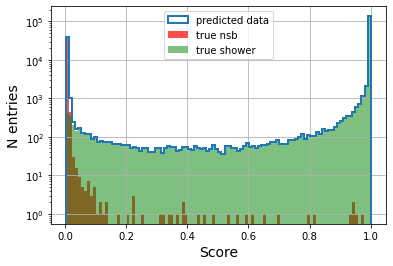

In [19]:
plt.hist(predict_clases_2stg_2k[:,1], bins = 100, histtype='step', linewidth=2, label = 'predicted data')
plt.hist(true_nsb_predict_val, bins = 100, color = 'r', alpha = 0.7, label = 'true nsb')
plt.hist(true_shower_predict_val, bins = 100, color = 'g', alpha = 0.5, label = 'true shower')
#plt.hist(predict_clases_2stg_2k[:,1], bins = 100, histtype='step', linewidth=2, label = 'shower + proton + muon')
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel("Score", fontsize=14)
#plt.title('train & validate showers set')
plt.ylabel("N entries", fontsize=14)
plt.savefig('predict_data.png', dpi=300)

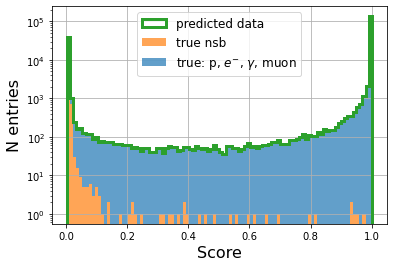

In [97]:
plt.hist(predict_clases_2stg_2k[:,1], bins = 100, histtype='step', linewidth=3, color = 'tab:green', label = 'predicted data')
plt.hist([true_nsb_predict_val, true_shower_predict_val], bins = 100, alpha = 0.7, stacked=True, color =['tab:orange', 'tab:blue'], label = ['true nsb', 'true: p, $e^{-}$, $\gamma$, muon'])


plt.grid()
plt.yscale('log')
plt.legend(fontsize=12)
plt.xlabel("Score", fontsize=16)
#plt.title('train & validate showers set')
plt.ylabel("N entries", fontsize=16)
plt.savefig('predict_data.png', dpi=200)

In [78]:
import math
threshold = np.arange(0.05, 1, 0.01)

true_nsb_predict_val = np.array(true_nsb_predict_val)
true_shower_predict_val = np.array(true_shower_predict_val)

n_nsb = len(true_nsb_predict_val)
n_nsb_err = math.sqrt(n_nsb)

n_shower = len(true_shower_predict_val)
n_shower_err = math.sqrt(n_shower)

fake_trigger = []
fake_trigger_err = []

loss_prob = []
loss_prob_err = []

for thr in threshold:
    
    n_fake = len(true_nsb_predict_val[true_nsb_predict_val > thr])
    n_fake_err = math.sqrt(n_fake)
    fake_trigger.append( 100*n_fake/n_nsb )

    fake_trigger_err_tmp = 100*math.sqrt((n_fake_err/n_nsb)*(n_fake_err/n_nsb) + 
                                     (n_fake*n_nsb_err/(n_nsb*n_nsb))*(n_fake*n_nsb_err/(n_nsb*n_nsb)))
    fake_trigger_err.append(fake_trigger_err_tmp )
    
    n_loss = len(true_shower_predict_val[true_shower_predict_val <= thr])
    n_loss_err =  math.sqrt(n_loss)
    loss_prob.append( 100*n_loss/n_shower )
    loss_prob_err_tmp = 100*math.sqrt((n_loss_err/n_shower)*(n_loss_err/n_shower) + 
                                     (n_loss*n_shower_err/(n_shower*n_shower))*(n_loss*n_nsb_err/(n_shower*n_shower)))
    loss_prob_err.append(loss_prob_err_tmp)
    

In [138]:
threshold = np.arange(0.04, 1., 0.02)

tpr = []
fpr = []

for thr in threshold:
    tp = len(true_nsb_predict_val[true_nsb_predict_val < thr])
    fn = len(true_shower_predict_val[true_shower_predict_val < thr])
    tpr.append(tp/(tp + fn))
    
    fp = len(true_nsb_predict_val[true_nsb_predict_val >= thr])
    tn = len(true_shower_predict_val[true_shower_predict_val >= thr])
    fpr.append(fp/(fp+tn))

In [139]:
fpr_cnn = [0.0005043508668110231,
 0.000424133891664086,
 0.0003773610334301444,
 0.0003506973481885133,
 0.000317233186641108,
 0.0002836764467498784,
 0.00025682790502774415,
 0.00024343568902443147,
 0.0002232762061989594,
 0.00021661285191126997,
 0.00020317357118186067,
 0.00020327406764960972,
 0.0002033829361716552,
 0.00020346983898753408,
 0.00019676758355837212,
 0.00019686108395785816,
 0.0001969319362483787,
 0.0001902316069815,
 0.00019029754380241678,
 0.0001699685898046041,
 0.00017003217008658037,
 0.00016328196754770896,
 0.00016333308379667754,
 0.00016338868124910646,
 0.00016344320348678833,
 0.00016349442075289181,
 0.0001635434412265758,
 0.0001636002972072066,
 0.00015001193276737923,
 0.00015006309471027592,
 0.0001432948256920799,
 0.0001433466668486942,
 0.00013657657165489832,
 0.00013661388816787115,
 0.00012982576016399043,
 0.00011620514993882141,
 0.00011624170068445848,
 0.00010944661057527874,
 0.00010948180891318777,
 0.0001095185291661533,
 0.00010270947597625356,
 0.00010274887489981984,
 9.59344356656822e-05,
 9.596336941099054e-05,
 9.599100427159969e-05,
 8.917179976129395e-05,
 8.920300545510687e-05,
 8.922810822683158e-05,
 8.925383791503035e-05,
 8.92869407546807e-05,
 8.245212623420526e-05,
 8.247932861826505e-05,
 7.563464341703568e-05,
 7.565909387917931e-05,
 7.568303943086355e-05,
 7.571377440048457e-05,
 6.886198680604332e-05,
 6.889139959767422e-05,
 6.20240515488784e-05,
 6.204842534885004e-05,
 6.207153399451012e-05,
 6.209680201469624e-05,
 5.522382908224899e-05,
 5.52455665432849e-05,
 5.527495837104698e-05,
 5.530323454793062e-05,
 4.84184460445588e-05,
 4.8441900860189755e-05,
 4.846202308176928e-05,
 4.848484848484849e-05,
 4.851072086931212e-05,
 4.853830365562767e-05,
 4.856962455680218e-05,
 4.860267314702309e-05,
 4.864252607586844e-05,
 4.867398167076919e-05,
 4.1753072330238964e-05,
 4.178272980501393e-05,
 3.4845391000132414e-05,
 3.487796201092378e-05,
 3.490718180358427e-05,
 3.494646202018508e-05,
 3.498215909885958e-05,
 3.501817443253048e-05,
 3.5055984407098137e-05,
 3.5101513577265454e-05,
 3.5156552126619835e-05,
 3.52226777688547e-05,
 3.529602778503307e-05,
 3.538144738424959e-05,
 2.1282633371169125e-05,
 1.423426757576189e-05,
 7.146430358036161e-06,
 7.183495201425205e-06,
 0.0,
 0.0]

tpr_cnn = [0.9740893454022007,
 0.9704045680962216,
 0.9673075991669492,
 0.9645314725837216,
 0.961865324891061,
 0.9596752888056296,
 0.9575406143671826,
 0.9558478832815116,
 0.9540029598510527,
 0.9524354208369078,
 0.9508516509658388,
 0.9492032582108337,
 0.9474258082867166,
 0.9460131121156896,
 0.9446952329181537,
 0.9431348953540502,
 0.941956921336664,
 0.94042913608131,
 0.9393020796616144,
 0.9382261130800104,
 0.9370165486850124,
 0.9360307202397677,
 0.9350236235206063,
 0.9339314082796001,
 0.9328635101393135,
 0.9318632135947225,
 0.9309084134783318,
 0.9298041587198214,
 0.9289000418235048,
 0.9278221314519124,
 0.9266839738537852,
 0.9255469383030444,
 0.9242862096867415,
 0.9234322670054279,
 0.9224326880926562,
 0.9212672811059908,
 0.9202918565575657,
 0.9191090269636577,
 0.9181171067738232,
 0.9170852542489507,
 0.9160366552119129,
 0.9148629478790098,
 0.9137568555758684,
 0.9128390101360606,
 0.9119646033845733,
 0.9107203862709818,
 0.9096637699622366,
 0.9088161094570331,
 0.9079494107763221,
 0.9068375099217598,
 0.9056484123748698,
 0.9046649472874531,
 0.9035632781254943,
 0.9026047309498014,
 0.9016685456595265,
 0.9004706253236956,
 0.8991568296795953,
 0.8979051126030042,
 0.8969005113483448,
 0.8957554037406205,
 0.8946732589095953,
 0.8934939005317485,
 0.8921209958061925,
 0.8909880806505515,
 0.8894622125350296,
 0.8880007105426769,
 0.8863696808510638,
 0.8849966806815667,
 0.8838232044198895,
 0.882497021051238,
 0.881000110144289,
 0.879411570684082,
 0.8776168531928901,
 0.875733555224665,
 0.8734766085703053,
 0.871706009285294,
 0.8696049227022679,
 0.8676805588701104,
 0.8656551664430111,
 0.8631517610497238,
 0.8609221629068365,
 0.857948816955188,
 0.8552701922460064,
 0.8525900660839906,
 0.8498002719700833,
 0.8464729412262694,
 0.8424966295921806,
 0.8377846205408576,
 0.8326393804388558,
 0.826752935339838,
 0.820737487944514,
 0.813182344928538,
 0.8037899644314048,
 0.7922947410121819,
 0.7749384892574152,
 0.7438262421898244]

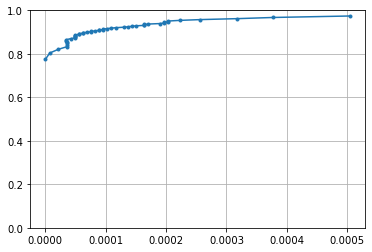

In [141]:
plt.plot(fpr, tpr, '.-')
#plt.plot(fpr_cnn, tpr_cnn, '-')
#plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()

In [130]:
tpr

[0.9740893454022007,
 0.9704045680962216,
 0.9673075991669492,
 0.9645314725837216,
 0.961865324891061,
 0.9596752888056296,
 0.9575406143671826,
 0.9558478832815116,
 0.9540029598510527,
 0.9524354208369078,
 0.9508516509658388,
 0.9492032582108337,
 0.9474258082867166,
 0.9460131121156896,
 0.9446952329181537,
 0.9431348953540502,
 0.941956921336664,
 0.94042913608131,
 0.9393020796616144,
 0.9382261130800104,
 0.9370165486850124,
 0.9360307202397677,
 0.9350236235206063,
 0.9339314082796001,
 0.9328635101393135,
 0.9318632135947225,
 0.9309084134783318,
 0.9298041587198214,
 0.9289000418235048,
 0.9278221314519124,
 0.9266839738537852,
 0.9255469383030444,
 0.9242862096867415,
 0.9234322670054279,
 0.9224326880926562,
 0.9212672811059908,
 0.9202918565575657,
 0.9191090269636577,
 0.9181171067738232,
 0.9170852542489507,
 0.9160366552119129,
 0.9148629478790098,
 0.9137568555758684,
 0.9128390101360606,
 0.9119646033845733,
 0.9107203862709818,
 0.9096637699622366,
 0.90881610945703

In [66]:
import math
math.sqrt(len(true_nsb_predict_val[true_nsb_predict_val > 0.5]))

3.605551275463989

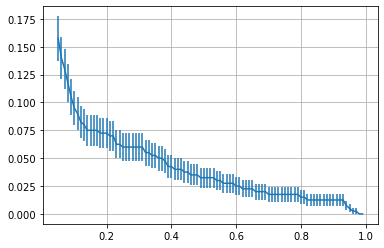

In [76]:
plt.errorbar(threshold, fake_trigger, yerr = fake_trigger_err)
#plt.plot([0, 1], [0.005, 0.005], 'r-')
plt.grid()

In [69]:
threshold[-6]

0.9400000000000002

In [70]:
fake_trigger[-6]

0.0075

In [71]:
fake_trigger_err[-6]

0.004330181145171643

In [72]:
100 - np.array(loss_prob[-6])

94.16405576747076

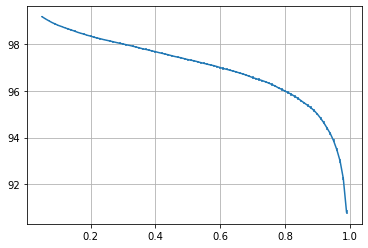

In [84]:
plt.errorbar(threshold, 100 - np.array(loss_prob), yerr = np.array(loss_prob_err))
#plt.plot([0, 1], [100 - 6.65, 100 - 6.65], 'r-')
plt.grid()

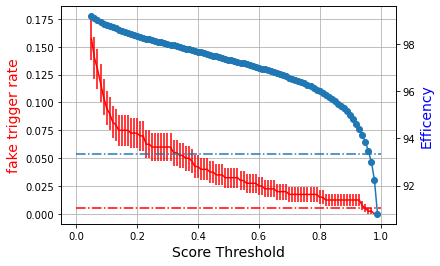

In [73]:
fig, ax = plt.subplots()
# make a plot
ax.errorbar(threshold, fake_trigger, yerr = fake_trigger_err, color="red")
# set x-axis label
ax.set_xlabel("Score Threshold",fontsize=14)
# set y-axis label
ax.set_ylabel("fake trigger rate",color="red",fontsize=14)
ax.plot([0, 1], [0.005, 0.005], 'r-.')
ax.grid(True)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(threshold, 100 - np.array(loss_prob), color="tab:blue",marker="o")
ax2.set_ylabel("Efficency", color="blue", fontsize=14)
ax2.plot([0, 1], [100 - 6.65, 100 - 6.65], '-.', color = 'tab:blue')
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')
#ax2.grid(True)
plt.show()

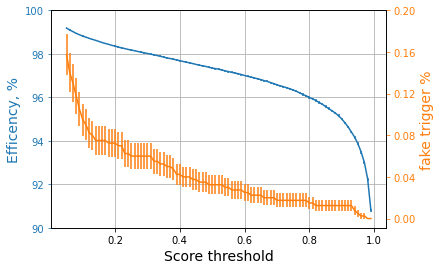

In [100]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
# make a plot
ax.errorbar(threshold, 100 - np.array(loss_prob), yerr = np.array(loss_prob_err), color="tab:blue")
# set x-axis label
ax.set_xlabel("Score threshold",fontsize=14)
# set y-axis label
ax.set_ylabel("Efficency, %", color="tab:blue",fontsize=14)
#ax.plot([0, 1], [100 - 6.65, 100 - 6.65], '-.', color = 'tab:blue')
ax.set_ylim(90., 100)
ax.tick_params(axis='y', colors='tab:blue')
ax.grid(True)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.errorbar(threshold, fake_trigger, yerr = fake_trigger_err,  color="tab:orange")
ax2.set_ylabel("fake trigger %", color="tab:orange", fontsize=14)
ax2.tick_params(axis='y', colors='tab:orange')
#ax2.plot([0, 1], [0.005, 0.005], 'r-.', label='safe threshold')
ax2.yaxis.set_ticks(np.arange(0.0, 0.21, 0.04))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')
#ax2.grid(True)
#ax2.set_xlim(0.9, 1)
#plt.legend()
plt.savefig('eff_vs_threshold.png', dpi=200)
plt.show()

In [ ]:
true_nsb_predict_val = np.array(true_nsb_predict_val)
true_shower_predict_val = np.array(true_shower_predict_val)

print(len(true_nsb_predict_val[true_nsb_predict_val > 0.5]))
print(len(true_shower_predict_val[true_shower_predict_val < 0.5]))

In [ ]:
true_nsb_predict_val[np.array(true_nsb_predict_val) > 0.5]

In [ ]:
0.00033*250*1000

In [ ]:
100*82/250000

In [ ]:
n_nsb_true = 40000
n_showers_true = len(true_clases_2stg_4k) - n_nsb_true
t_2k = np.append(np.zeros(n_nsb_true), np.ones(n_showers_true))

#n_nsb_predict = 39990+4685+2137+2439
n_nsb_predict = 39990
n_showers_wrong = 4685+2137+2439
n_showers_predict = len(true_clases_2stg_4k) - n_nsb_predict - n_showers_wrong
p_2k = np.append(np.zeros(n_nsb_predict), np.ones(n_showers_predict))
p_2k = np.append(p_2k, np.zeros(n_showers_wrong))


model_acc_2stg_2k = accuracy_score(t_2k, p_2k)
print("Model Accuracy : {:.2f}%".format(model_acc_2stg_2k * 100))

fig, ax3 = plt.subplots(1, 1, figsize=(10, 10))

#model_pred_classes_2stg = np.argmax(predict_clases_2stg, axis=1)
plot_heatmap(t_2k, p_2k, ['nsb', 'shower'], ax3, title="")

In [ ]:
h = [150, 160, 162, 160, 150, 160, 160, 160, 120, 160, 162, 120]

In [ ]:
h1 = [150, 160, 162, 160, 150, 160, 160, 160, 120, 160, 162, 120]

In [ ]:
np.sum(h1)

In [ ]:
(1824 - 1510)/12

In [ ]:
1824/12

In [ ]:
len(h1)